## Final Project Submission

Please fill out:
* Student name: Andrew Reusche
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbor


# Movie Data Analysis

<img src='../images/movie_profitability.jpeg'/>

Authors: Andrew Reusche

## Overview

For over 100 years, countles movies have been produced and released, making them not only a staple of the American pastime, but also a proven business venture that can return great profits if executed properly. However, what may have made a movie a successful investment years ago, may not be in line with with the modern day market. To help solve for that, this project uses exploratory data analysis (E.D.A.)to highlight some attributes that modern succesful films have had, in an effort to help guide those new to movie production. 

## Business Problem

My company recognizes that more large orgaizations are branching into the movie production business with mixed results in terms of investment success. Now our company too would like a share in the market, and they plan to achieve this through opening their own movie production studio, but currently do not know anything about creating movies, or what makes them successful in the modern market. To help guide the head of our company's new movie studio, I will use E.D.A. on existing movie data to generate insites into attributes that are commonly present in modern successful movies. The studio head can then use these insites to help decide factors that could make this new movie venture successful. 

## Data Understanding

To compile relevant information for this analysis, I drew and combined data from two of the largest and most well know reputable movie information hubs: IMDB.com, and The-Numbers.com. These combined databases contain information on 139,457 movies from 1915 up to 2020, with each record including information on many factors such as their earnings, staff, and ratings. 

Due to these datasets not including a complete list of all the details and factors that went into making and releasing these movies, we can only outline some factors that were commonly present in modern profitable movies instead of claiming outright cause. 

In [1]:
#Import the relevant libraries to help us view and manipulate the data.

import numpy as np
import pandas as pd 
import sqlite3 

In [2]:
#read in the csv file from The-Numbers.com and save it as a Dataframe
TN = pd.read_csv('../zippedData/tn.movie_budgets.csv', index_col= 0)
TN.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#information on the TN dataset
TN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Here is an Entity Relatiohship Diagram (E.R.D.) for the SQL Datastructure I am about to bring in. 

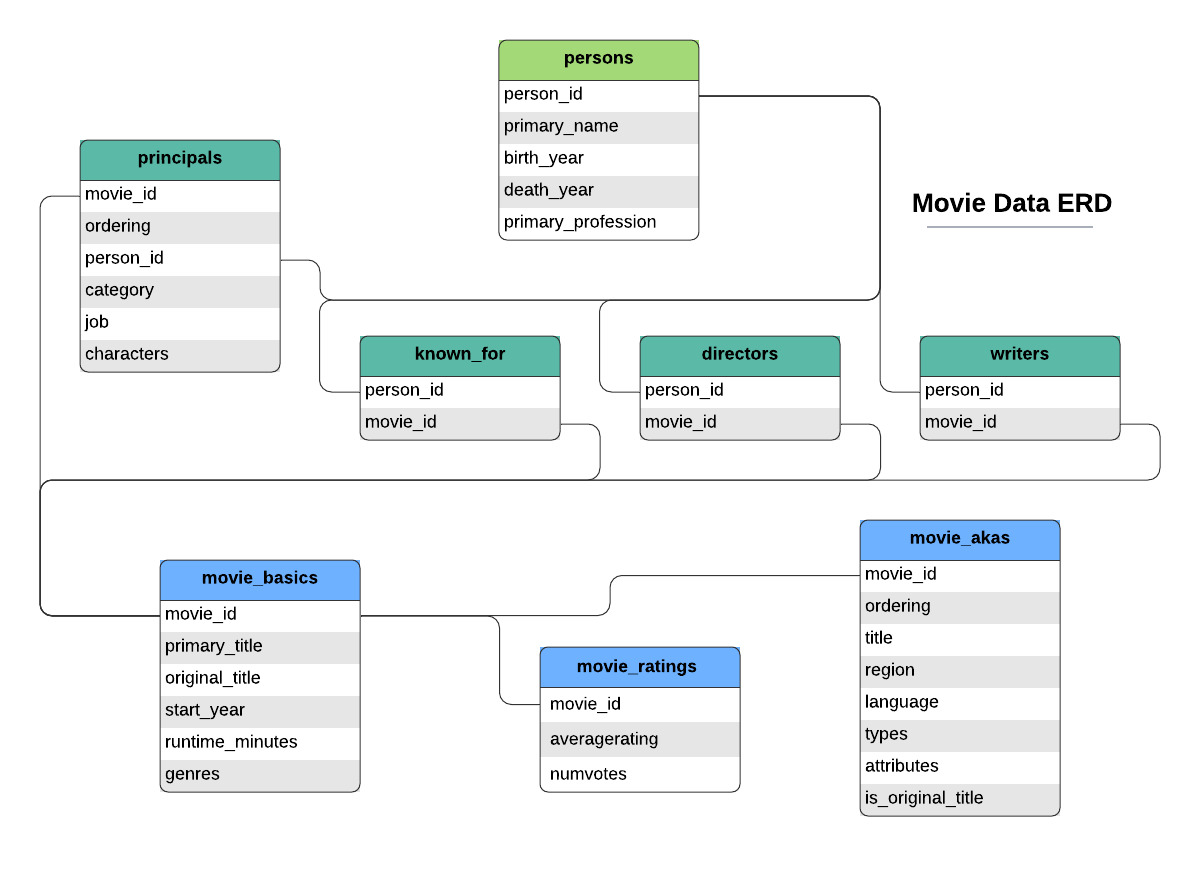

In [4]:
#read in the SQL file from IMDB.com and save it as a Dataframe

#connects to the SQLite database
conn = sqlite3.connect('../zippedData/im.db')

#a query to dictate what data is retrieved from the file
query= """
        SELECT mov.genres, mov.primary_title
        FROM movie_basics AS mov;
        """

#reads the data into a database
IMDB = pd.read_sql(query, conn)

#the database currently has multiple genres for each movie
#this changes is so there is one instance for each movie's genre
IMDB['genres'] = IMDB['genres'].str.split(',') 
IMDB = IMDB.explode('genres', ignore_index=True)

#previews the first 10 rows of the dataset
IMDB.head(10)

,genres,primary_title
0,Action,Sunghursh
1,Crime,Sunghursh
2,Drama,Sunghursh
3,Biography,One Day Before the Rainy Season
4,Drama,One Day Before the Rainy Season
5,Drama,The Other Side of the Wind
6,Comedy,Sabse Bada Sukh
7,Drama,Sabse Bada Sukh
8,Comedy,The Wandering Soap Opera
9,Drama,The Wandering Soap Opera


In [5]:
#Info on the IMDB dataset
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234958 entries, 0 to 234957
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   genres         229550 non-null  object
 1   primary_title  234958 non-null  object
dtypes: object(2)
memory usage: 3.6+ MB


### Movie Data

In this E.D.A., we will specifically be focussing a subset of this merged data, detailing movie production budget level, genre, and release date in relation to the domestic profitability of the 938 different movies released between 2015 and 2020. All three of these attributes can have highly variable options, but are also factors that any new studio should easily be able to control when trying to make their first movie.

In [6]:
#rename column in IMDB so it can merge with other dataframes on "movie"
IMDB.rename(columns={'primary_title': 'movie'}, inplace=True)

In [7]:
#merge the TN dataframe with the IMDB dataframe on the "movie" column
movies_df =TN.merge(IMDB, how='outer', on=['movie'])

movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Action
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Adventure
3,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Fantasy
4,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Action


## Data Preperation

### Data Cleaning and Trimming

Text about this 

In [8]:
len(movies_df)

238759

In [9]:
movies_df= movies_df.drop('worldwide_gross', axis=1)

movies_df= movies_df.drop_duplicates(keep='first')

movies_df= movies_df.dropna(subset=['movie', 'release_date','production_budget', 'domestic_gross'])

In [10]:
movies_df['year']= movies_df['release_date'].str[-4:].astype(int)

movies_df= movies_df[movies_df['year']>= 2015]

In [11]:
x=['production_budget','domestic_gross']

for col in x:
    movies_df[col] = movies_df[col].replace({'\$': '', ',': ''}, regex=True).astype(int)

movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,year
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,2019
5,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Adventure,2019
6,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Sci-Fi,2019
7,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Action,2015
8,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Adventure,2015


### Feature Engineering

Text on this

In [12]:
movies_df['profit_multiplier']= movies_df['domestic_gross']/movies_df['production_budget']

def profitability(num):
    if 0 < num < 1:
        x='Investment Loss'
    elif 1 < num < 2:
        x='Profit Made'
    else:
        x='Investment Doubled'
    return x

movies_df['profitability']= movies_df['profit_multiplier'].apply(lambda x: profitability(x))

In [13]:
movies_df['Release_Month']= movies_df['release_date'].str[:3]

def month_to_season(month):
    season_dict= { 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
                  'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
                  'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
                  'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}
    return season_dict.get(month)

movies_df['Season']= movies_df['Release_Month'].apply( lambda x : month_to_season(x))

In [14]:
def budget_leveler(budget):
    if 0 < budget < 5000000:
        x='Low Budget'
    elif 5000000 < budget < 50000000:
        x='Mid Level Budget'
    else:
        x='High End Budget'
    return x

movies_df['level']= movies_df['production_budget'].apply(lambda x: budget_leveler(x))

In [15]:
movies_df.head()

,release_date,movie,production_budget,domestic_gross,genres,year,profit_multiplier,profitability,Release_Month,Season,level
4,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Action,2019,0.122178,Investment Loss,Jun,Summer,High End Budget
5,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Adventure,2019,0.122178,Investment Loss,Jun,Summer,High End Budget
6,"Jun 7, 2019",Dark Phoenix,350000000,42762350,Sci-Fi,2019,0.122178,Investment Loss,Jun,Summer,High End Budget
7,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Action,2015,1.388403,Profit Made,May,Spring,High End Budget
8,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,Adventure,2015,1.388403,Profit Made,May,Spring,High End Budget


## Analysis

In [16]:
#import graphing libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Budget Level Analysis

When making a movie, budget is often one of the first items that is brought up, and can directly affect everthing from your casting options, to scale of production. On the flip side, the more money you invest the more money you stand to loose if things don't work out. Movie budget levels can be broken down into three commonly recognized ranges: Low Level Budget (under 5,000,000 dollars), Mid Level Budget (between 5,000,000 dollars and 50,000,000 dollars), and High End Budget (over 50,000,000 dollars). This analysis displays how often these budget levels result in an investment net loss, investment profit, and even a profit that doubles the investment cost.

describe it 

In [17]:
Budget_analysis=movies_df[['movie','level','profitability']]

Budget_analysis=Budget_analysis.drop_duplicates(subset=['movie'], keep='first')

Budget_analysis= Budget_analysis.drop('movie', axis= 1)

budget_counts = Budget_analysis.groupby('level')['profitability'].value_counts().unstack(fill_value=0)
budget_counts= budget_counts.reset_index()

budget_counts2 = budget_counts[[budget_counts.columns[0], budget_counts.columns[2], budget_counts.columns[3], budget_counts.columns[1]]]
budget_counts2 = pd.concat([budget_counts2.iloc[1:], budget_counts2.iloc[:1]], ignore_index=True)
budget_counts2= budget_counts2.set_index('level')
budget_counts2['Profit Made']= budget_counts2['Profit Made']+ budget_counts2['Investment Doubled']
budget_counts2= budget_counts2.reset_index()

budget_counts2

profitability,level,Investment Loss,Profit Made,Investment Doubled
0,Low Budget,58,164,152
1,Mid Level Budget,180,261,185
2,High End Budget,131,144,82


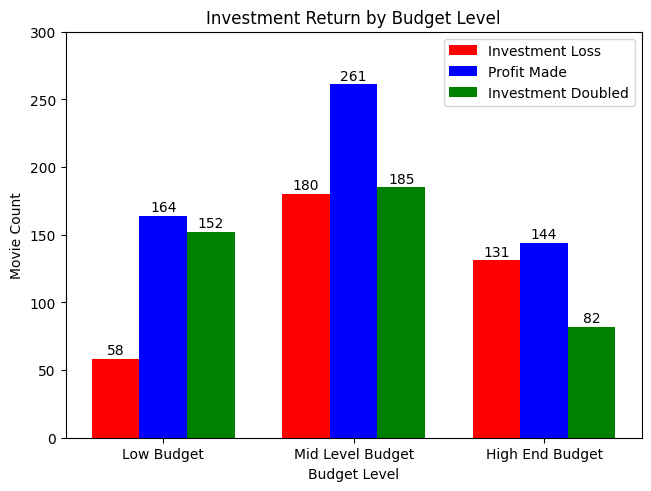

In [18]:
budgets = budget_counts2['level']
losses= budget_counts2['Investment Loss'].to_list()
profits= budget_counts2['Profit Made'].to_list()
doubles= budget_counts2['Investment Doubled'].to_list()

budget_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
    }

x = np.arange(len(budgets))  
width = 0.25  
multiplier = 0

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(layout='constrained')

for (attribute, measurement), color in zip(budget_counts.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color= color)
    ax.bar_label(rects, padding=1)
    multiplier += 1


ax.set_ylabel('Movie Count')
ax.set_xlabel('Budget Level')
ax.set_title('Investment Return by Budget Level')
ax.set_xticks(x + width, budgets)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 300)

plt.show()

Describe the graph 

### Movie Genre Analysis

describe it 

In [19]:
Genre_analysis=movies_df[['movie','genres','profitability']]

Genre_analysis=Genre_analysis.drop_duplicates(keep='first')

Genre_analysis= Genre_analysis.dropna(subset=['genres'])

Genre_analysis= Genre_analysis.drop('movie', axis= 1)

genre_counts = Genre_analysis.groupby('genres')['profitability'].value_counts().unstack(fill_value=0)
genre_counts= genre_counts.sort_values(by=['Investment Doubled'], ascending=[False])
genre_counts= genre_counts.reset_index()

top_10_genre_counts= genre_counts.head(10)

top_10_genre_counts2 = top_10_genre_counts[[top_10_genre_counts.columns[0], top_10_genre_counts.columns[2], 
                                             top_10_genre_counts.columns[3], top_10_genre_counts.columns[1]]]
top_10_genre_counts2['Profit Made']= top_10_genre_counts2['Profit Made']+ top_10_genre_counts2['Investment Doubled']

top_10_genre_counts2

profitability,genres,Investment Loss,Profit Made,Investment Doubled
0,Drama,177,241,178
1,Comedy,90,174,114
2,Horror,35,104,91
3,Action,128,132,81
4,Thriller,57,101,76
5,Adventure,100,110,66
6,Mystery,24,63,53
7,Crime,56,73,50
8,Documentary,30,51,43
9,Romance,29,58,43


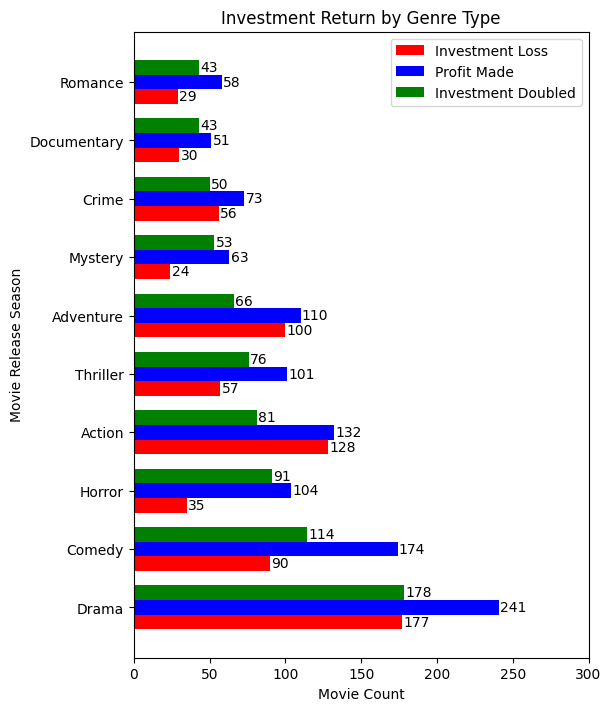

In [20]:
genres = top_10_genre_counts2['genres']
losses = top_10_genre_counts2['Investment Loss'].to_list()
profits = top_10_genre_counts2['Profit Made'].to_list()
doubles = top_10_genre_counts2['Investment Doubled'].to_list()

genre_counts = {
    'Investment Loss': losses,
    'Profit Made': profits,
    'Investment Doubled': doubles
}

y = np.arange(len(genres))  
height = 0.25  
multiplier = 0  
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(layout='constrained', figsize=(6,7))

for (attribute, measurement), color in zip(genre_counts.items(), colors):
    offset = height * multiplier  
    rects = ax.barh(y+ offset, measurement, height, label=attribute, color=color)
    ax.bar_label(rects, padding=1)  
    multiplier += 1  

ax.set_xlabel('Movie Count') 
ax.set_ylabel('Movie Release Season') 
ax.set_title('Investment Return by Genre Type')
ax.set_yticks(y+ height, genres)

ax.legend(loc='upper right', ncols=1)

ax.set_xlim(0, 300)

plt.show()

describe the graph

### Movie Release Season Analysis

describe it 

In [21]:
Season_analysis= movies_df[['movie','Season', 'profitability']]

Season_analysis= Season_analysis.drop_duplicates(subset=['movie'], keep='first')

Season_analysis= Season_analysis.drop('movie', axis= 1)

seasonal_profits= Season_analysis.groupby('Season')['profitability'].value_counts().unstack(fill_value=0)
seasonal_profits= seasonal_profits.reset_index()

seasonal_profits2 = seasonal_profits[[seasonal_profits.columns[0], seasonal_profits.columns[2], 
                                      seasonal_profits.columns[3], seasonal_profits.columns[1]]]
seasonal_profits2 = pd.concat([seasonal_profits2.iloc[1:2], seasonal_profits2.iloc[2:3], 
                               seasonal_profits2.iloc[:1], seasonal_profits2.iloc[3:]], ignore_index=True)
seasonal_profits2['Profit Made']= seasonal_profits2['Profit Made']+ seasonal_profits2['Investment Doubled']

seasonal_profits2

profitability,Season,Investment Loss,Profit Made,Investment Doubled
0,Spring,96,138,102
1,Summer,81,116,82
2,Fall,101,136,89
3,Winter,91,179,146


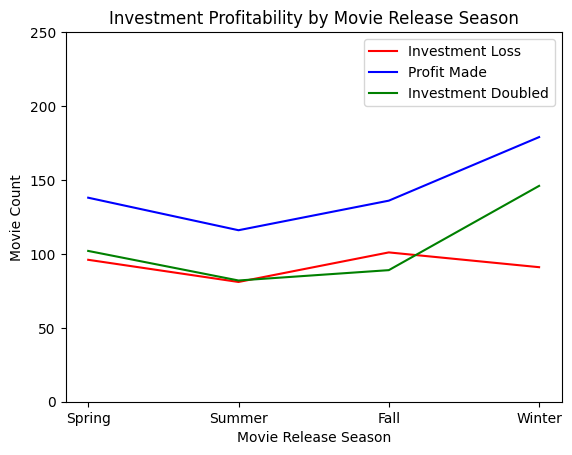

In [22]:
loss = seasonal_profits2['Investment Loss']
profit = seasonal_profits2['Profit Made']
doubled = seasonal_profits2['Investment Doubled']
Season = seasonal_profits2['Season'].tolist()

fig, ax = plt.subplots()
ax.plot(Season, loss, label= "Investment Loss", color= 'red')
ax.plot(Season, profit, label= "Profit Made", color= 'blue')
ax.plot(Season, doubled, label= "Investment Doubled", color= 'green')
ax.legend()
ax.set_ylim(0,250)
ax.set_ylabel('Movie Count')
ax.set_xlabel('Movie Release Season')
ax.set_title('Investment Profitability by Movie Release Season')


plt.show()

desribe the graph

## Conclusions

### This analysis resulted in 3 recommendations for investing in a new movie studio.

make those three recomendations

### Next steps

describe the possible next steps

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?

In [23]:
# Here you run your code to clean the data